In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df

,Age,Gender,Blood Pressure,Cholesterol,Blood Sugar,Disease
0,58,Female,112,Low,High,No
1,25,Male,130,Low,High,No
2,19,Female,151,High,High,Yes
3,65,Female,98,Low,Low,No
4,35,Female,132,Low,Low,Yes
...,...,...,...,...,...,...
4995,47,Male,124,High,High,Yes
4996,38,Female,142,High,High,No
4997,44,Female,91,Low,High,Yes
4998,25,Male,143,High,High,No


In [4]:
df.shape

(5000, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             5000 non-null   int64 
 1   Gender          5000 non-null   object
 2   Blood Pressure  5000 non-null   int64 
 3   Cholesterol     5000 non-null   object
 4   Blood Sugar     5000 non-null   object
 5   Disease         5000 non-null   object
dtypes: int64(2), object(4)
memory usage: 234.5+ KB


In [6]:
df.nunique(axis=0)

Age               57
Gender             2
Blood Pressure    70
Cholesterol        2
Blood Sugar        2
Disease            2
dtype: int64

In [7]:
df.duplicated().sum()

196

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.isnull().sum()

Age               0
Gender            0
Blood Pressure    0
Cholesterol       0
Blood Sugar       0
Disease           0
dtype: int64

In [11]:
df.describe()

,Age,Blood Pressure
count,4804.000000,4804.000000
mean,46.349500,124.561615
std,16.239606,20.064184
min,18.000000,90.000000
25%,33.000000,107.000000
50%,46.000000,125.000000
75%,60.000000,142.000000
max,74.000000,159.000000


In [12]:
df['Gender'] = df['Gender'].apply(lambda x:0 if 'Female' in x else 1)

In [13]:
df['Gender']

0       0
1       1
2       0
3       0
4       0
       ..
4995    1
4996    0
4997    0
4998    1
4999    0
Name: Gender, Length: 4804, dtype: int64

In [14]:
df['Cholesterol'] = df['Cholesterol'].apply(lambda x:0 if 'Low' in x else 1)

In [15]:
df['Cholesterol'] 

0       0
1       0
2       1
3       0
4       0
       ..
4995    1
4996    1
4997    0
4998    1
4999    1
Name: Cholesterol, Length: 4804, dtype: int64

In [16]:
df['Blood Sugar'] = df['Blood Sugar'].apply(lambda x:0 if 'Low' in x else 1)

In [17]:
df.head(20)

,Age,Gender,Blood Pressure,Cholesterol,Blood Sugar,Disease
0,58,0,112,0,1,No
1,25,1,130,0,1,No
2,19,0,151,1,1,Yes
3,65,0,98,0,0,No
4,35,0,132,0,0,Yes
5,33,0,92,1,0,Yes
6,32,1,147,0,1,No
7,26,1,138,1,0,Yes
8,65,1,155,0,0,Yes
9,24,0,119,1,0,No


In [18]:
df['Disease'] = df['Disease'].apply(lambda x:0 if 'No' in x else 1)

In [19]:
df

,Age,Gender,Blood Pressure,Cholesterol,Blood Sugar,Disease
0,58,0,112,0,1,0
1,25,1,130,0,1,0
2,19,0,151,1,1,1
3,65,0,98,0,0,0
4,35,0,132,0,0,1
...,...,...,...,...,...,...
4995,47,1,124,1,1,1
4996,38,0,142,1,1,0
4997,44,0,91,0,1,1
4998,25,1,143,1,1,0


In [20]:
df.dtypes

Age               int64
Gender            int64
Blood Pressure    int64
Cholesterol       int64
Blood Sugar       int64
Disease           int64
dtype: object

In [21]:
df['Disease'].value_counts()

0    2416
1    2388
Name: Disease, dtype: int64

Text(0.5, 1.0, 'Disease Distributions \n 0: No || 1: Yes')

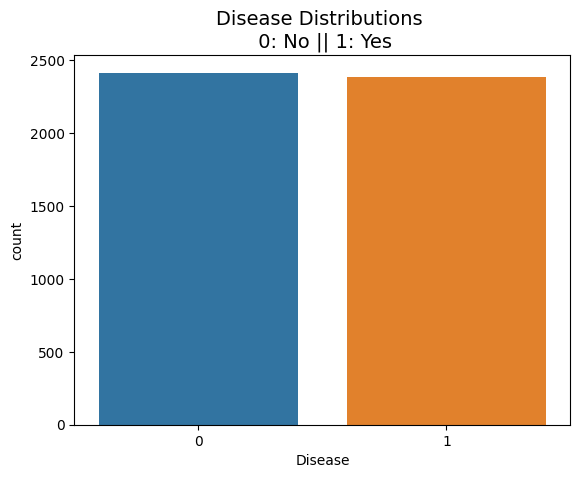

In [22]:
sns.countplot('Disease', data=df, palette="tab10")
plt.title('Disease Distributions \n 0: No || 1: Yes', fontsize=14)

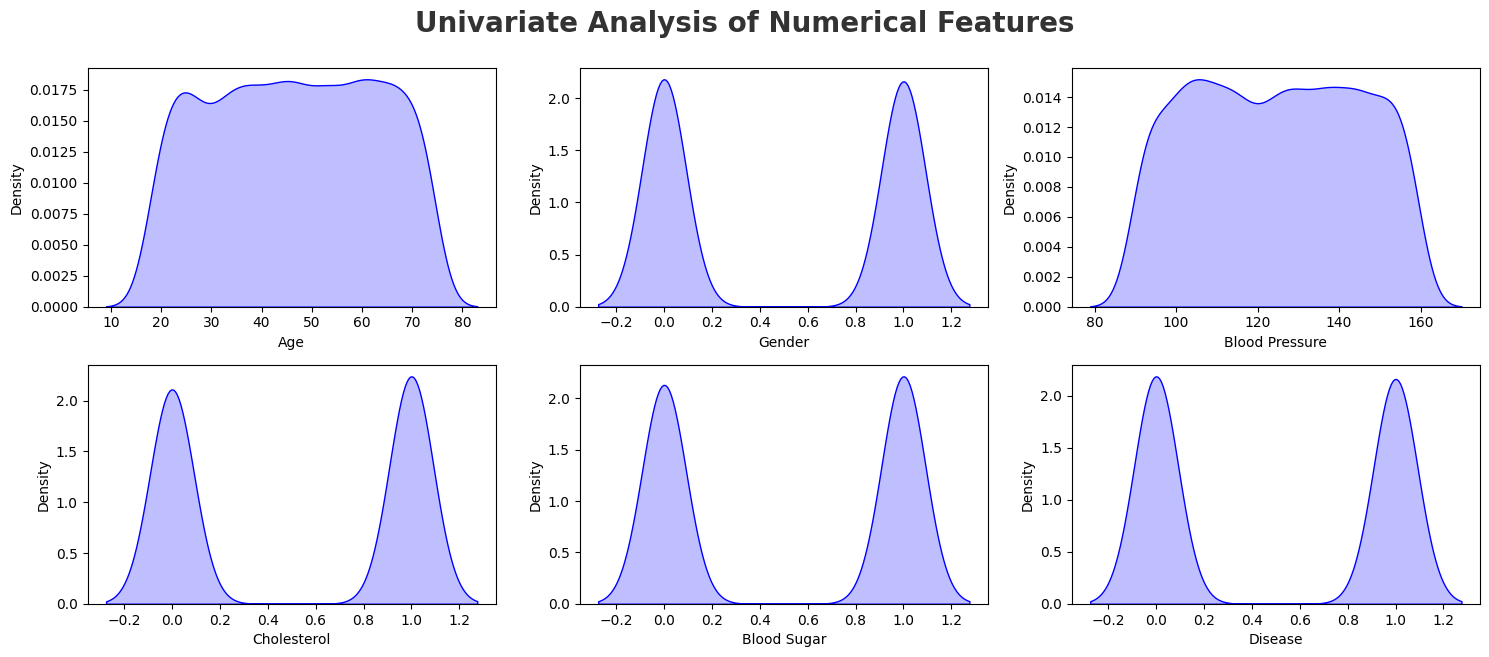

In [23]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(df.columns)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[df.columns[i]],shade=True, color='b')
    plt.xlabel(df.columns[i])
    plt.tight_layout()

In [24]:
df.corr()

,Age,Gender,Blood Pressure,Cholesterol,Blood Sugar,Disease
Age,1.000000,0.006778,-0.013288,-0.020195,0.015448,-0.009194
Gender,0.006778,1.000000,0.024657,-0.007362,0.001337,0.019541
Blood Pressure,-0.013288,0.024657,1.000000,0.013871,0.021527,0.015499
Cholesterol,-0.020195,-0.007362,0.013871,1.000000,0.021512,0.005587
Blood Sugar,0.015448,0.001337,0.021527,0.021512,1.000000,0.010938
Disease,-0.009194,0.019541,0.015499,0.005587,0.010938,1.000000


<AxesSubplot:>

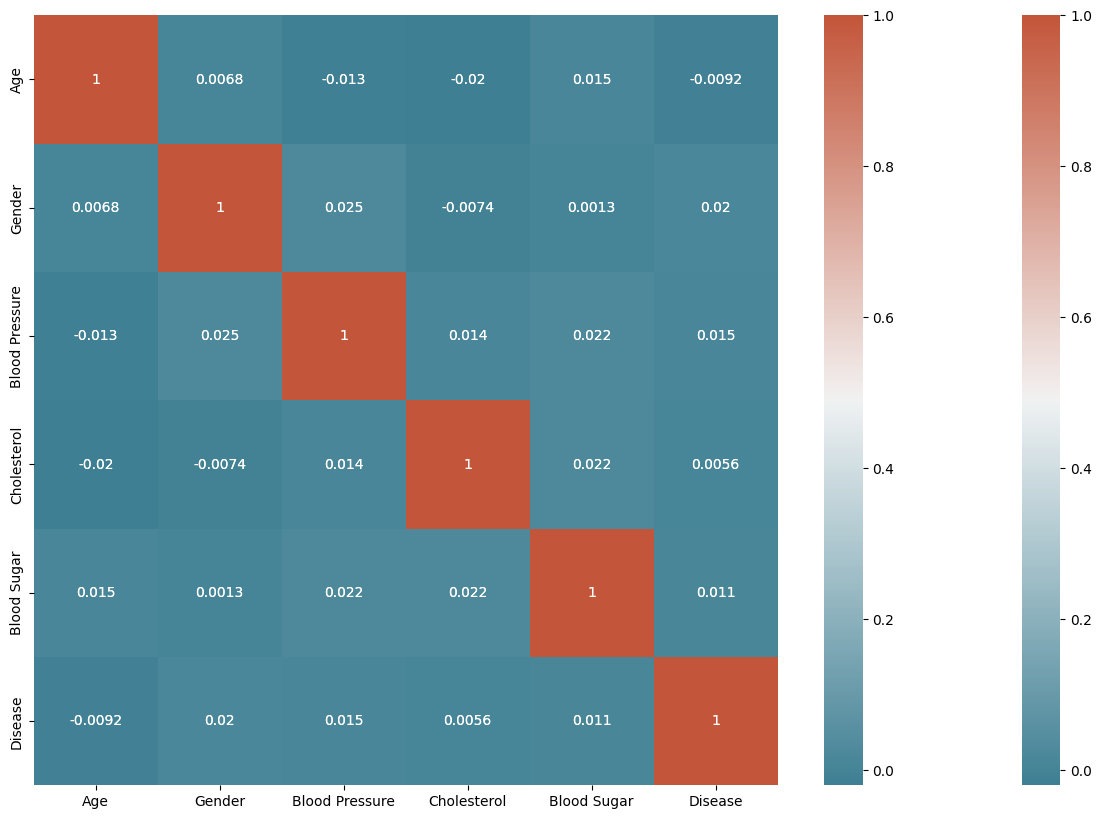

In [25]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [26]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [27]:
X

,Age,Gender,Blood Pressure,Cholesterol,Blood Sugar
0,58,0,112,0,1
1,25,1,130,0,1
2,19,0,151,1,1
3,65,0,98,0,0
4,35,0,132,0,0
...,...,...,...,...,...
4995,47,1,124,1,1
4996,38,0,142,1,1
4997,44,0,91,0,1
4998,25,1,143,1,1


In [28]:
y

0       0
1       0
2       1
3       0
4       1
       ..
4995    1
4996    0
4997    1
4998    0
4999    1
Name: Disease, Length: 4804, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,
                                                    random_state=0)
X_train.shape, X_test.shape

((3603, 5), (1201, 5))

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) # get instance of model
model1.fit(X_train, y_train) # Train/Fit model 

y_pred1 = model1.predict(X_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy

              precision    recall  f1-score   support

           0       0.48      0.85      0.62       577
           1       0.53      0.16      0.24       624

    accuracy                           0.49      1201
   macro avg       0.51      0.50      0.43      1201
weighted avg       0.51      0.49      0.42      1201



In [32]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(random_state=1)
model6.fit(X_train, y_train) 
y_pred6 = model6.predict(X_test) 
print(classification_report(y_test, y_pred6)) 

              precision    recall  f1-score   support

           0       0.44      0.49      0.47       577
           1       0.48      0.43      0.45       624

    accuracy                           0.46      1201
   macro avg       0.46      0.46      0.46      1201
weighted avg       0.46      0.46      0.46      1201



In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred6)
print(cm)
accuracy_score(y_test, y_pred6)

[[285 292]
 [356 268]]


0.4604496253122398

<AxesSubplot:>

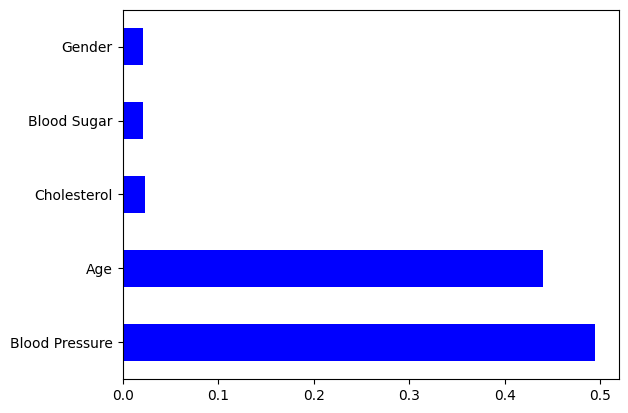

In [34]:
index= df.columns[:-1]
importance = pd.Series(model6.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')